In [76]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
import seaborn as sns

In [148]:
alerts1 = pd.read_json('/content/drive/MyDrive/data/air_alerts/air_alert_2022_03_15_2022_04_09.json')
alerts2 = pd.read_json('/content/drive/MyDrive/data/air_alerts/air_alert_2022_04_09_2022_04_11.json')
alerts3 = pd.read_json('/content/drive/MyDrive/data/air_alerts/air_alert_2022_04_10_2022_04_16.json')
alerts4 = pd.read_json('/content/drive/MyDrive/data/air_alerts/air_alert_2022_04_17_2022_04_20.json')
alerts5 = pd.read_json('/content/drive/MyDrive/data/air_alerts/air_alert_2022_04_21_2022_04_26.json')
alerts6 = pd.read_json('/content/drive/MyDrive/data/air_alerts/air_alert_2022_04_27_2022_05_05.json')
pdList = [alerts1,alerts2,alerts3,alerts4,alerts5,alerts6]
alerts_data = pd.concat(pdList)

In [149]:
alerts_data = alerts_data.iloc[1:,:]

In [150]:
#those fields are same in all data sets
alerts_data[['id', 'type', 'date', 'from', 'from_id', 'text']] = alerts_data.messages.apply(pd.Series)
alerts_data[["info", "message", "region", "other"]] = alerts_data.text.apply(pd.Series)
alerts_data = alerts_data.drop(["type", "messages", "other", "from", "from_id"], axis=1)
#in info column there's a mismatched formating across data sets
alerts_type1 = alerts_data['info'].str['text']
alerts_data1 = alerts_data.loc[alerts_type1.isna()]
alerts_data1[["region_type", "region_text"]] = alerts_data1.message.apply(pd.Series)
alerts_data1.rename(columns = {'info':'message_text'}, inplace = True)
alerts_data1 = alerts_data1.drop(["region_type", "region"], axis=1)
#rest of the data
alerts_type2 = alerts_data['info'].str['text']
alerts_data2 = alerts_data.loc[~alerts_type2.isna()]
alerts_data2[["region_type", "region_text"]] = alerts_data2.region.apply(pd.Series)
alerts_data2[["message_type", "message_text"]] = alerts_data2['info'].apply(pd.Series)
alerts_data2 = alerts_data2.drop(["message_type", "region_type", "region", "info"], axis=1)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [151]:
data = [alerts_data1, alerts_data2]
alerts = pd.concat(data)
alerts = alerts.drop(["text", "message"], axis=1)

In [163]:
alerts.head()

,name,id,date,message_text,region_text,date_stamp,duration
1,Повітряна Тривога,6,2022-03-15 18:02:56,🟢 18:02 Відбій тривоги в Київська область.,#Київська_область,2022-03-15,NaT
2,Повітряна Тривога,7,2022-03-15 18:10:34,🔴 18:10 Повітряна тривога в Вінницька область,#Вінницька_область,2022-03-15,0 days 00:07:38
3,Повітряна Тривога,8,2022-03-15 18:11:25,🔴 18:11 Повітряна тривога в Житомирська область,#Житомирська_область,2022-03-15,0 days 00:00:51
4,Повітряна Тривога,9,2022-03-15 18:11:50,🔴 18:11 Повітряна тривога в Уманська територіа...,#Уманська_територіальна_громада,2022-03-15,0 days 00:00:25
5,Повітряна Тривога,10,2022-03-15 18:14:46,🔴 18:14 Повітряна тривога в м. Первомайськ та ...,#м_Первомайськ_та_Первомайська_територіальна_г...,2022-03-15,0 days 00:02:56


In [392]:
district_names = {
    "Черкас": "Cherkasy",
    "Чернігі": "Chernihiv",
    "Чернівц": "Chernivtsi",
    "Дніпро": "Dnipro",
    "Дніпр": "Donetsk",
    "Івано": "Ivano Frankivsk",
    "Харків": "Kharkiv",
    "Хмель": "Khmelnytskyi",
    "Херсон": "Kherson",
    "Київ": "Kyiv",
    "Кропив": "Kropyvnytskyi",
    "Луган": "Luhansk",
    "Львів": "Lviv",
    "Микол": "Mykolaiv",
    "Одес": "Odesa",
    "Полтав": "Poltava",
    "Рівн": "Rivne",
    "Сум": "Sumy",
    "Терноп": "Ternopil",
    "Вінни": "Vinnytsia",
    "Луцьк": "Lutsk",
    "Волин": "Lutsk",
    "Ужгор": "Uzhhorod",
    "Закап": "Zaporizhzhia",
    "Житом": "Zhytomyr",
}
def normalize_region(text_region):
    for key, val in district_names.items():
        if key in text_region:
            return val
    return None
alerts["region_name"] = alerts["region_text"].apply(normalize_region)

In [158]:
alerts["date"] = alerts['date'].apply(pd.Timestamp)
alerts = alerts.sort_values(by="date")
alerts["date_stamp"] = alerts['date'].apply(lambda x: x.date())

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



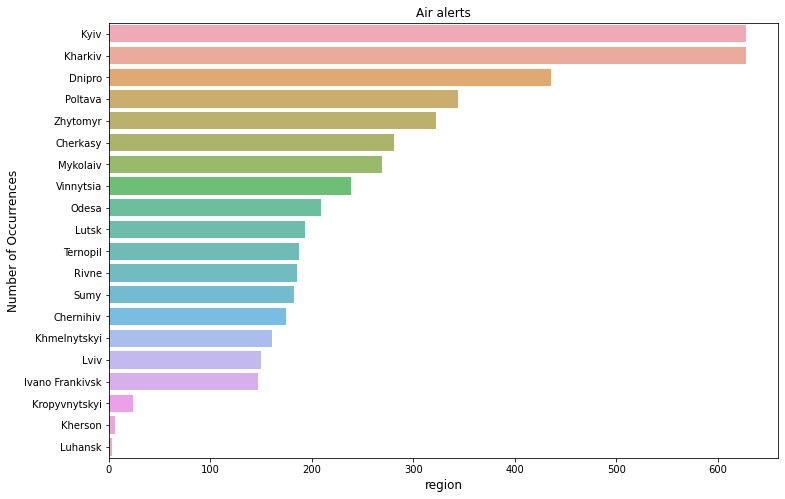

In [395]:
# Plotting a bar graph of the number of stores in each city, for the first ten cities listed
# in the column 'City'
city_count  = alerts['region_name'].value_counts()
city_count = city_count
plt.figure(figsize=(12,8))
sns.barplot(city_count.values, city_count.index, alpha=0.8)
plt.title('Air alerts')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('region', fontsize=12)
plt.show()

In [377]:
kyiv = alerts.loc[alerts["region_text"] == "#Харківська_область"]
kyiv['duration'] = kyiv['date'] - kyiv['date'].shift(1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [378]:
kyiv_duration = kyiv.loc[~kyiv["message_text"].str.contains("Повітряна тривога")]
kyiv["alerts_sum"] = kyiv_duration["duration"].sum()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



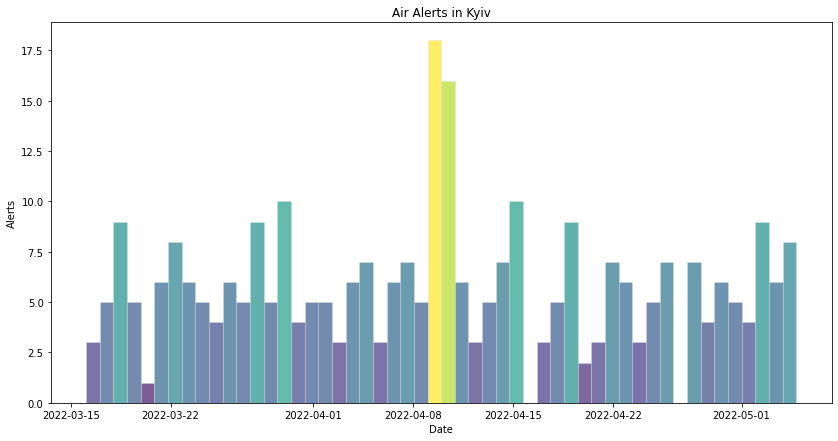

In [235]:
plt.figure(figsize=(14,7)) # Make it 14x7 inch
n, bins, patches = plt.hist(kyiv.loc[kyiv["message_text"].str.contains("Повітряна тривога")]['date'],
                            bins=52, facecolor='#2ab0ff', edgecolor='#e0e0e0', linewidth=0.5, alpha=0.7)

n = n.astype('int') # it MUST be integer
# Good old loop. Choose colormap of your taste
for i in range(len(patches)):
    patches[i].set_facecolor(plt.cm.viridis(n[i]/max(n)))

# Add title and labels with custom font sizes
plt.title('Air Alerts in Kyiv', fontsize=12)
plt.xlabel('Date', fontsize=10)
plt.ylabel('Alerts', fontsize=10)
plt.show()

In [379]:
kyiv = kyiv.iloc[1:]
kyiv["alert_hours"] = kyiv['duration'].apply(lambda x:x.components.minutes)
kyiv.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,name,id,date,message_text,region_text,date_stamp,duration,alerts_sum,alert_hours
119,Повітряна Тривога,124,2022-03-16 06:23:09,🟢 06:23 Відбій тривоги в Харківська область.,#Харківська_область,2022-03-16,0 days 04:36:04,11 days 13:46:55,36
138,Повітряна Тривога,143,2022-03-16 09:39:56,🔴 09:39 Повітряна тривога в Харківська область,#Харківська_область,2022-03-16,0 days 03:16:47,11 days 13:46:55,16
140,Повітряна Тривога,145,2022-03-16 09:48:36,🟢 09:48 Відбій тривоги в Харківська область.,#Харківська_область,2022-03-16,0 days 00:08:40,11 days 13:46:55,8
276,Повітряна Тривога,281,2022-03-16 21:50:31,🔴 21:50 Повітряна тривога в Харківська область,#Харківська_область,2022-03-16,0 days 12:01:55,11 days 13:46:55,1
314,Повітряна Тривога,319,2022-03-16 23:49:08,🟢 23:49 Відбій тривоги в Харківська область.,#Харківська_область,2022-03-16,0 days 01:58:37,11 days 13:46:55,58


In [380]:
to_group = kyiv.loc[kyiv["message_text"].str.contains("Відбій")]
kyiv_grouped = to_group.groupby(pd.Grouper(key='date', axis=0, 
                      freq='D', sort=True)).sum()
              

In [381]:
kyiv.drop_duplicates(subset ="message_text",
                     keep = False, inplace = True)
 

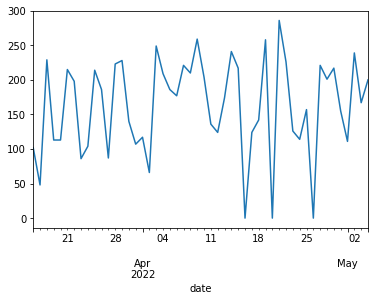

In [384]:
kyiv_grouped.drop('id', axis=1)['alert_hours'].plot()